In this Notebook, We want to investigate the dataset [DiabetesDiagnosis.xls]() to explore an algorithm that can better fit the data than others.

# 1. Import Required Dependencies

In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import seaborn as sns

sns.set_theme(style='whitegrid')
warnings.filterwarnings('ignore')

# 2. Loading and Splitting data into X, y

In [31]:
diabetes = pd.read_excel("assets/DiabetesDiagnosis.xls")
X, y = diabetes.iloc[: , :-1], diabetes.iloc[: , -1]

In [32]:
diabetes

,Pregnancies,PG Concentration,Diastolic BP,Tri Fold Thick,Serum Ins,BMI,DP Function,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1
764,2,122,70,27,0,36.8,0.340,27,1
765,5,121,72,23,112,26.2,0.245,30,1
766,1,126,60,0,0,30.1,0.349,47,0


# 3. Plotting

In [33]:
y.value_counts()

1    500
0    268
Name: Diagnosis, dtype: int64

As you can see, we have an unbalanced dataset.

In [116]:
def hide_frame_except_bottom():
    for key, value in plt.gca().spines.items():
        if key != 'bottom':
            value.set_visible(False)

<IPython.core.display.Javascript object>


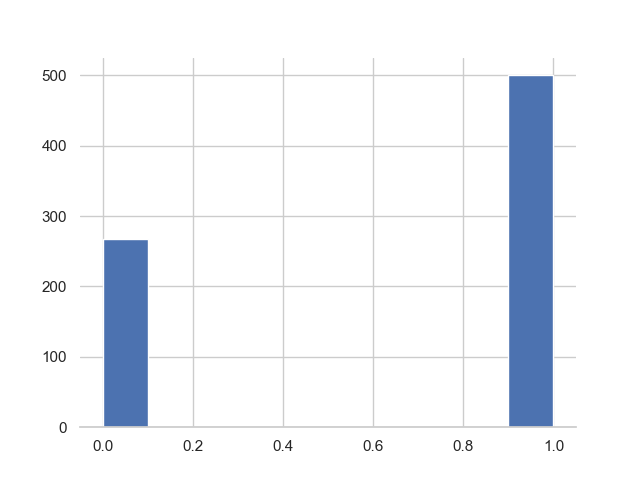

In [117]:
fig, subaxes = plt.subplots(1,1)
subaxes.hist(x=y, bins=10);

hide_frame_except_bottom()

<IPython.core.display.Javascript object>


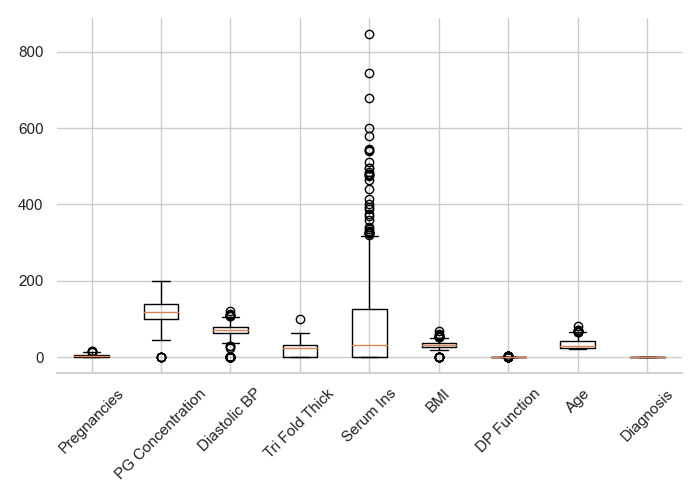

In [119]:
plt.figure(figsize=(7, 5))
_ = plt.boxplot(diabetes, labels=diabetes.columns, widths=0.5)
plt.xticks(rotation=45)
plt.tight_layout()

hide_frame_except_bottom()

# 4. Create Predictive Models using different Algorithms

As the targets of this task are binary-type classification, we must use classification algorithms.

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("----The result of using MinMaxScaler----\n")
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = LogisticRegression(C=7).fit(X_train_scaled, y_train)
print("----Logistic Regression----")
print("Model Coeffs :\n{}".format(clf.coef_))
print("Model Intercept : {}".format(clf.intercept_))
print("R-Squared score (Training) : {:.3f}".format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test) : {:.3f}".format(clf.score(X_test_scaled, y_test)))


clf = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)
print("\n----K-Nearest Neighbors (KNN) Classifier----")
print("R-Squared score (Training) : {:.3f}".format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test) : {:.3f}".format(clf.score(X_test_scaled, y_test)))


clf = LinearSVC(C=2).fit(X_train_scaled, y_train)
print("\n----Linear Suport Vector Machine (LSVM) Classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test): {:.3f}"
      .format(clf.score(X_test_scaled, y_test)))


clf = DecisionTreeClassifier(max_depth=2, random_state=0).fit(X_train_scaled, y_train)
print("\n----Decision Tree Classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test): {:.3f}"
      .format(clf.score(X_test_scaled, y_test)))


clf = GaussianNB().fit(X_train_scaled, y_train)
print("\n----Naive Bayes (NB) Classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test): {:.3f}"
      .format(clf.score(X_test_scaled, y_test)))


mlp = MLPClassifier(alpha=.7, random_state=0).fit(X_train_scaled, y_train)
print("\n----Multi-layer Perceptron (MLP) Classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(mlp.score(X_train_scaled, y_train)))
print("R-Squared score (Test) : {:.3f}"
      .format(mlp.score(X_test_scaled, y_test)))




print("\n\n\n\n----The result of using StandardScaler----\n")
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


clf = LogisticRegression(C=.5).fit(X_train_scaled, y_train)
print("----Logistic Regression----")
print("Model Coeffs :\n{}".format(clf.coef_))
print("Model Intercept : {}".format(clf.intercept_))
print("R-Squared score (Training) : {:.3f}".format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test) : {:.3f}".format(clf.score(X_test_scaled, y_test)))


clf = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)
print("\n----K-Nearest Neighbors (KNN) Classifier----")
print("R-Squared score (Training) : {:.3f}".format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test) : {:.3f}".format(clf.score(X_test_scaled, y_test)))


clf = LinearSVC(C=1).fit(X_train_scaled, y_train)
print("\n----Linear Suport Vector Machine (LSVM) classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(clf.score(X_train_scaled, y_train)))
print("R-Squared score (Test): {:.3f}"
      .format(clf.score(X_test_scaled, y_test)))


mlp = MLPClassifier(alpha=1.5, random_state=0).fit(X_train_scaled, y_train)
print("\n----Multi-layer Perceptron (MLP) Classifier----")
print("R-Squared score (Training): {:.3f}"
      .format(mlp.score(X_train_scaled, y_train)))
print("R-Squared score (Test) : {:.3f}"
      .format(mlp.score(X_test_scaled, y_test)))

----The result of using MinMaxScaler----

----Logistic Regression----
Model Coeffs :
[[-1.37049203 -6.00779503  1.10268856 -0.59753523  0.60004816 -5.04400738
  -1.89347258 -1.31005458]]
Model Intercept : [7.22124273]
R-Squared score (Training) : 0.764
R-Squared score (Test) : 0.802

----K-Nearest Neighbors (KNN) Classifier----
R-Squared score (Training) : 0.773
R-Squared score (Test) : 0.781

----Linear Suport Vector Machine (LSVM) Classifier----
R-Squared score (Training): 0.762
R-Squared score (Test): 0.802

----Decision Tree Classifier----
R-Squared score (Training): 0.748
R-Squared score (Test): 0.750

----Naive Bayes (NB) Classifier----
R-Squared score (Training): 0.766
R-Squared score (Test): 0.766

----Multi-layer Perceptron (MLP) Classifier----
R-Squared score (Training): 0.764
R-Squared score (Test) : 0.792




----The result of using StandardScaler----

----Logistic Regression----
Model Coeffs :
[[-0.28844691 -1.01520032  0.19820942 -0.08981089  0.10599029 -0.67629789
  -0.2

As you can see when using `MinMaxScaler`, the Classification model **Logistic Regression** better fits the data than others, with an R-Squared score of **0.80** on the test set, in this dataset, But when using `StandardScaler` the Classification model **Multi-layer perceptron (MLP)** better fits the data than others, with an R-Squared score of **0.80** on both test and train set. 